In [1]:
%matplotlib widget

## Python Package Imports

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

In [3]:
%load_ext autoreload
%autoreload 2
#import warnings
#warnings.filterwarnings("always")
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
from IPython.display import display, Math, clear_output

import sympy  #Sympy1.2 is from conda-forge: [sudo conda install -c conda-forge sympy]
from sympy import *
from sympy.physics.vector import ReferenceFrame, CoordinateSym
from sympy.vector import CoordSys3D, divergence, curl

import ipyvolume as ipv
import time
from ipywidgets import Output

import helpers

np.seterr(divide='ignore', invalid='ignore');

## Symbolic Calculation of the Divergence
### (be sure to also try this example by hand) 

**Step 1.** Initialize the coordinate system and the vector field; display the equation for the vector field. Note that the subscript **A** simply represents the coordinate system; awkward, but don't let it throw you.

In [4]:
A = CoordSys3D('A')  # initialize a 3D coordinate system 
F = A.x*A.y*A.z*(A.i + A.j + A.k)
display(Math(r'\textbf{F} = ' + latex(F)))

<IPython.core.display.Math object>

**Step 2.** Symbolically calculate the divergence

In [5]:
div = divergence(F)
display(Math(r'\nabla \cdot \textbf{F} = ' + latex(div)))

<IPython.core.display.Math object>

### Above we have the divergence of the vector field F  

### A Few Notes:
* The *vector field* has three vector components at each point in space (i.e. x,y,z)
* The divergence of the vector field is a *scalar field*. At each point in space there is only a single scalar value.

## Displaying 3D Data

First let's display a straight-forward scalar field of a box inside a box. Displaying a 3D volume is challenging. 
* To see "inside" a 3D scalar field there must be a notion of transparency and opacity.
* The colormap is not obvious. For example, red is *not necessarily* the greatest value. 

In [6]:
V = np.zeros((128,128,128)) # our 3d array 128x128x128
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0

# corner (near 0,0,0)
V[0:10, 0:10, 0:10] = 0.25
# corner (near 128,128,128)
V[-10:-1, -10:-1, -10:-1] = 0.75

ipv.volshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
ipv.show()

A Jupyter Widget

## Numerical Evaluation of the Divergence for Display

**Step 3.** Create a function from the symbolic divergence (to evaluate at any x,y,z point)

In [7]:
vars = symbols('A.x A.y A.z')  # seems unnecessary but is to fix a lambdify "bug"
div_func = lambdify(vars, div.subs(dict(zip([A.x, A.y, A.z], vars))), modules='numpy')

**Step 4.** Create a field (i.e. x, y, z arrays) and evaluate the divergence over the field.
Note: the ordering of x,y,z combined with meshgrid is [not obvious](https://github.com/maartenbreddels/ipyvolume/issues/79)

In [8]:
x = np.linspace(0, 10, 41)
y = np.linspace(0, 10, 41)
z = np.linspace(0, 10, 41)
X, Y, Z = np.meshgrid(x,y,z, indexing='ij')
divergence_data = helpers.check_lambdify_out(div_func(X, Y, Z), X, Y, Z)

**Step 5.** Let's first check a few points of the divergence. Recall the expression we found:

In [9]:
display(Math(r'\nabla \cdot \textbf{F} = ' + latex(div)))

<IPython.core.display.Math object>

In [10]:
def my_func_eval(func, indx_x, indx_y, indx_z):
    display(Math(r'\nabla \cdot \textbf{F}' + '({},{},{}) = {}'.format(indx_x, indx_y, indx_z, func[indx_x, indx_y,indx_z])))
    return func[indx_x,indx_y,indx_z]

x = my_func_eval(divergence_data, 0, 0, 0);
x = my_func_eval(divergence_data, 0, 40, 40);
x = my_func_eval(divergence_data, 40, 0, 40);
x = my_func_eval(divergence_data, 40, 40, 0);
x = my_func_eval(divergence_data, 40, 40, 40);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Step 5.** Display the divergence along the xy plane (z=0)

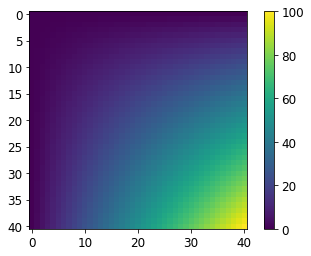

In [11]:
x = np.linspace(0, 10, 41)
y = np.linspace(0, 10, 41)
z = np.linspace(0, 0, 41)
X, Y, Z = np.meshgrid(x,y,z, indexing='ij')
divergence_data = helpers.check_lambdify_out(div_func(X, Y, Z), X, Y, Z)

plt.figure()
plt.imshow(divergence_data[:,:,0])
plt.colorbar()
plt.show()

**Step 6.** Now display the divergence in 3D 

In [12]:
# plot a 3d figure 
ipv.figure()
ipv.volshow(divergence_data, opacity=0.03, level_width=20)
# ipv.view(azimuth = 115, elevation = 90)
ipv.show()

A Jupyter Widget

### Let's Go Back to the Vector Field and Display as a Quiver Plot (a quiver plot shows magnitude and direction at each point in a field)

Recall the vector field:

In [13]:
display(Math(r'\textbf{F} = ' + latex(F)))

<IPython.core.display.Math object>

In [14]:
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
z = np.linspace(-10, 10, 10)
X, Y, Z = np.meshgrid(x,y,z, indexing='ij');
 
u,v,w = helpers.evaluate_field_components(A, F, X,Y,Z);

ipv.figure()
quiver = ipv.quickquiver(X.flatten(), Y.flatten(), Z.flatten(), u.flatten(), v.flatten(), w.flatten(), size=2);
ipv.show()

A Jupyter Widget

## Sympy also supports spherical or cylindrical coordinates 

## Try an example in spherical coordinates

In [15]:
A = CoordSys3D('A', transformation='spherical') 
r, theta, phi, a, b, c = symbols('r \theta phi a b c')

F = a*A.r**2*A.i + c*cos(A.theta)/A.r*A.j + b * A.k 
div = divergence(F)

In [16]:
display(Math(r'\textbf{F} = ' + latex(F)))

<IPython.core.display.Math object>

In [17]:
display(Math(r'\nabla \cdot \textbf{F} = ' + latex(div)))

<IPython.core.display.Math object>

## You should check this with a hand calculation of the divergence 